In [49]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [50]:
data = pd.read_csv(r"C:\Users\Neel Arora\Downloads\customer_purchase_data.csv")
data

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_14028\2879848975.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(data.Age,


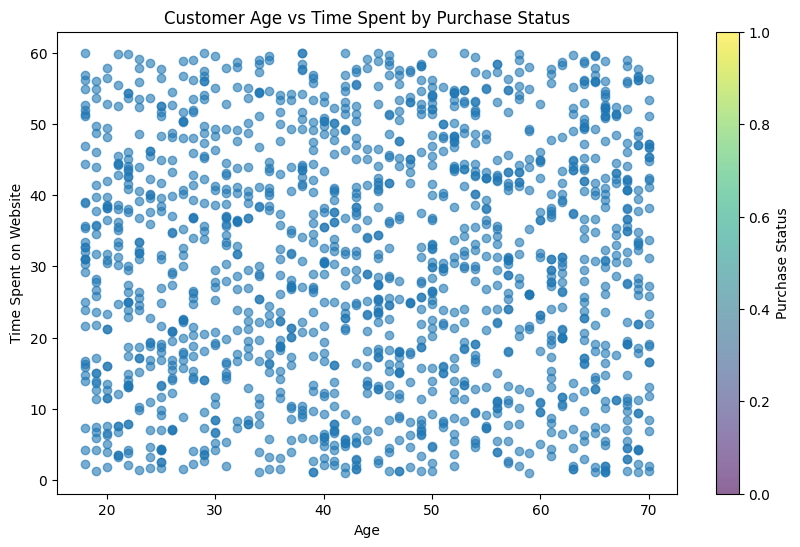

In [51]:
# Create scatter plot of Age vs Time Spent on Website, colored by Purchase Status
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data.Age, 
                     data.TimeSpentOnWebsite,
                     cmap='coolwarm',
                     alpha=0.6)
plt.colorbar(scatter, label='Purchase Status')
plt.xlabel('Age')
plt.ylabel('Time Spent on Website')
plt.title('Customer Age vs Time Spent by Purchase Status')
plt.show()

In [52]:
data.shape

(1500, 9)

In [53]:
from sklearn.model_selection import train_test_split
X = data[['Age', 'TimeSpentOnWebsite']]
y = data.PurchaseStatus
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=35)

In [54]:
X_test

,Age,TimeSpentOnWebsite
1049,60,22.588059
850,39,26.848587
597,27,22.173253
861,58,7.808775
944,38,43.908840
...,...,...
411,43,41.153444
1011,32,36.533122
856,30,29.537759
73,42,1.797305


In [55]:
y_test

1049    0
850     1
597     0
861     0
944     1
       ..
411     0
1011    1
856     0
73      0
1041    0
Name: PurchaseStatus, Length: 150, dtype: int64

In [56]:
X_train

,Age,TimeSpentOnWebsite
678,20,16.050513
214,38,57.652866
1052,55,43.179008
633,65,19.047794
1141,62,41.675611
...,...,...
959,65,14.461789
1004,55,47.921983
1057,65,36.669873
951,51,8.047484


In [57]:
y_test

1049    0
850     1
597     0
861     0
944     1
       ..
411     0
1011    1
856     0
73      0
1041    0
Name: PurchaseStatus, Length: 150, dtype: int64

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
model.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

In [61]:
model.score(X_test, y_test)

0.76

In [62]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

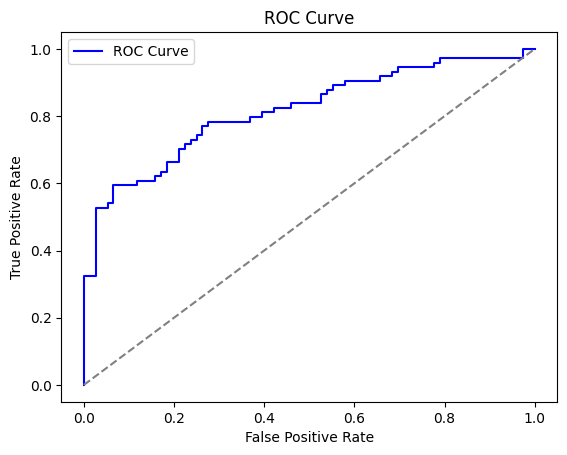

In [63]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [64]:
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)

AUC Score: 0.8163229018492176
